In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import time
import random
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina 
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem import PandasTools

from tqdm import tqdm

In [2]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [4]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
data = pd.read_csv("./data/final_data_added_lipinski.csv")
data.head()

,smiles,zinc_id,MolWt,LogP,HDonors,HAcceptors
0,C[C@H](NC(=O)c1ccc(-c2ccccc2)nc1O)c1ccc(N2CCN(...,2325719276,434.515,3.8361,2,5
1,C[C@@H](NC(=O)/C=C/c1c(Cl)nc2sccn12)c1ccc(N2CC...,2325719436,447.967,3.8307,1,6
2,C[C@H]1CN(c2ccc(CNC(=O)[C@@H](C)n3ccc4ccccc4c3...,252536409,437.515,3.6316,1,5
3,O=C(NCc1ccc(N2CCOCC2)cc1C(F)(F)F)c1ccc(NCC2CC2...,170617918,434.462,3.6889,2,5
4,COc1ccc(Cl)cc1NC(=O)C1=C(C)NC(=S)N[C@@H]1c1ccc...,867170,430.961,3.8461,3,4


In [6]:
data.drop(columns=["smiles", "zinc_id"], inplace=True)
data.head()

,MolWt,LogP,HDonors,HAcceptors
0,434.515,3.8361,2,5
1,447.967,3.8307,1,6
2,437.515,3.6316,1,5
3,434.462,3.6889,2,5
4,430.961,3.8461,3,4


In [7]:
len(data)

10301988

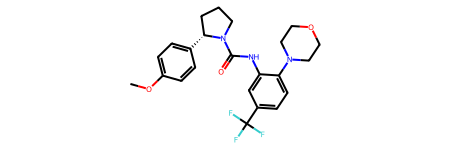

In [8]:
zinc27 = Chem.MolFromSmiles("COc1ccc([C@@H]2CCCN2C(=O)Nc2cc(C(F)(F)F)ccc2N2CCOCC2)cc1")
zinc27

In [9]:
desc_MolWt = Descriptors.MolWt(zinc27)
desc_MolLogP = Descriptors.MolLogP(zinc27)
desc_NumHDonors = Descriptors.NumHDonors(zinc27)
desc_NumHAcceptors = Descriptors.NumHAcceptors(zinc27)

row = np.array([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])
row

array([449.473 ,   4.9196,   1.    ,   4.    ])

In [10]:
row = pd.DataFrame(row.reshape(1, -1), columns=["MolWt", "LogP", "HDonors", "HAcceptors"])
row

,MolWt,LogP,HDonors,HAcceptors
0,449.473,4.9196,1.0,4.0


In [11]:
final_data = pd.concat([data, row], axis=0)
len(final_data)

10301989

In [12]:
final_data.tail()

,MolWt,LogP,HDonors,HAcceptors
10301984,343.365,-0.8124,1.0,7.0
10301985,329.265,-0.6892,1.0,8.0
10301986,328.350,-0.0430,2.0,6.0
10301987,332.272,-0.0249,1.0,8.0
0,449.473,4.9196,1.0,4.0


In [13]:
final_data = final_data.reset_index(drop=True)
final_data

,MolWt,LogP,HDonors,HAcceptors
0,434.515,3.8361,2.0,5.0
1,447.967,3.8307,1.0,6.0
2,437.515,3.6316,1.0,5.0
3,434.462,3.6889,2.0,5.0
4,430.961,3.8461,3.0,4.0
...,...,...,...,...
10301984,343.365,-0.8124,1.0,7.0
10301985,329.265,-0.6892,1.0,8.0
10301986,328.350,-0.0430,2.0,6.0
10301987,332.272,-0.0249,1.0,8.0


### Normalization

In [14]:
final_data.describe()

,MolWt,LogP,HDonors,HAcceptors
count,1.030199e+07,1.030199e+07,1.030199e+07,1.030199e+07
mean,3.527293e+02,2.768256e+00,1.092599e+00,4.655518e+00
std,6.281170e+01,1.183963e+00,8.426663e-01,1.615120e+00
min,1.361940e+02,-7.203800e+00,0.000000e+00,0.000000e+00
25%,3.113810e+02,1.983000e+00,1.000000e+00,4.000000e+00
50%,3.484240e+02,2.828520e+00,1.000000e+00,5.000000e+00
75%,3.948140e+02,3.650720e+00,2.000000e+00,6.000000e+00
max,4.999990e+02,4.999990e+00,5.000000e+00,1.000000e+01


In [15]:
noramlized_data = final_data.values
normalized_data = StandardScaler().fit_transform(noramlized_data)

In [16]:
normalized_data.shape

(10301989, 4)

In [17]:
print("mean: ", np.mean(normalized_data, axis=0), "\nstandard deviation: ", np.std(normalized_data, axis=0))

mean:  [ 9.56418304e-16 -2.84978842e-16  8.34278209e-17  2.03404973e-16] 
standard deviation:  [1. 1. 1. 1.]


In [18]:
feat_cols = [f"normalized feature {i}" for i in range(normalized_data.shape[1])]

normalized_data = pd.DataFrame(normalized_data, columns=feat_cols)
normalized_data.head()

,normalized feature 0,normalized feature 1,normalized feature 2,normalized feature 3
0,1.302078,0.901923,1.076821,0.213286
1,1.516242,0.897362,-0.109888,0.832435
2,1.349840,0.729198,-0.109888,0.213286
3,1.301234,0.777595,1.076821,0.213286
4,1.245496,0.910369,2.263531,-0.405863


## K-means

### Elbow method

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

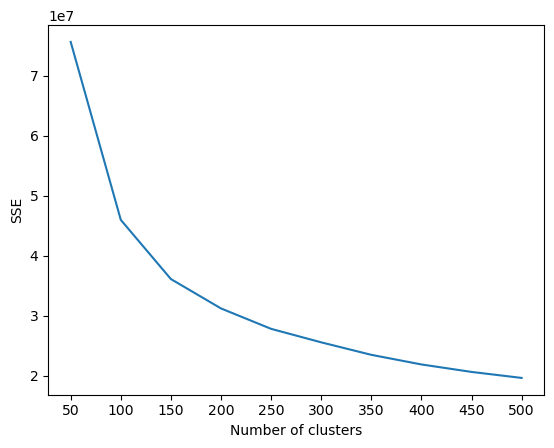

In [21]:
#initialize kmeans parameters

kmeans_kawrgs = {
    "init": "random",
    "n_init": 10,
    "random_state": 42,
}

# create list to hold SSE values for each k
sse = []
for k in (50, 100, 150, 200, 250, 300, 350, 400, 450, 500):
    kmeans = KMeans(n_clusters=k, **kmeans_kawrgs)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# visualize results
plt.plot((50, 100, 150, 200, 250, 300, 350, 400, 450, 500), sse)
plt.xticks((50, 100, 150, 200, 250, 300, 350, 400, 450, 500))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [21]:
kmeans_kawrgs = {
    "init": "random",
    "n_init": 10,
    "random_state": 42,
}

kmeans = KMeans(n_clusters=150, **kmeans_kawrgs)
kmeans.fit(noramlized_data)
print(kmeans.labels_)

[ 68  97 146 ... 113  64   6]


In [22]:
len(kmeans.labels_)

10301989

In [23]:
kmeans.labels_

array([ 68,  97, 146, ..., 113,  64,   6], dtype=int32)

In [24]:
kmeans.labels_ = pd.DataFrame(kmeans.labels_, columns=["cluster"])
kmeans.labels_

,cluster
0,68
1,97
2,146
3,68
4,99
...,...
10301984,81
10301985,113
10301986,113
10301987,64


In [25]:
normalized_data = pd.concat([normalized_data, kmeans.labels_], axis=1)
normalized_data.head()

,normalized feature 0,normalized feature 1,normalized feature 2,normalized feature 3,cluster
0,1.302078,0.901923,1.076821,0.213286,68
1,1.516242,0.897362,-0.109888,0.832435,97
2,1.349840,0.729198,-0.109888,0.213286,146
3,1.301234,0.777595,1.076821,0.213286,68
4,1.245496,0.910369,2.263531,-0.405863,99


In [26]:
from matplotlib.colors import ListedColormap

In [27]:
normalized_data.tail()

,normalized feature 0,normalized feature 1,normalized feature 2,normalized feature 3,cluster
10301984,-0.149085,-3.024297,-0.109888,1.451584,81
10301985,-0.373566,-2.920240,-0.109888,2.070734,113
10301986,-0.388133,-2.374446,1.076821,0.832435,113
10301987,-0.325692,-2.359158,-0.109888,2.070734,64
10301988,1.540218,1.817070,-0.109888,-0.405863,6


### Normalization 후 scatter plot 그리기

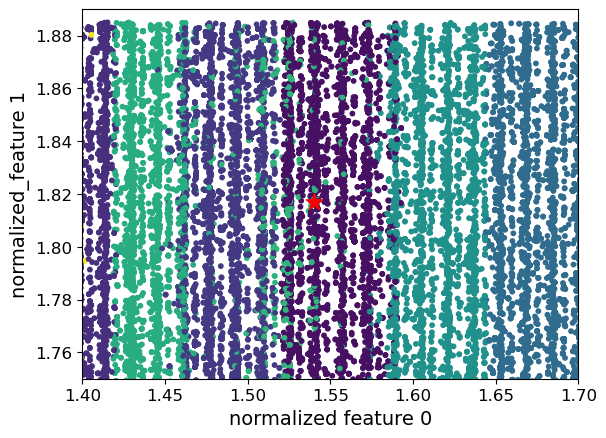

In [31]:
plt.scatter(
    x = normalized_data["normalized feature 0"],
    y = normalized_data["normalized feature 1"],
    c = normalized_data["cluster"],
    s = 10,
)
plt.scatter(
    x = normalized_data["normalized feature 0"][10301988],
    y = normalized_data["normalized feature 1"][10301988],
    marker = "*",
    s=150,
    c="red"
)
plt.xlabel("normalized feature 0", fontsize=14)
plt.ylabel("normalized_feature 1", fontsize=14)
plt.xlim(1.4, 1.7)
plt.ylim(1.75, 1.89)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [28]:
count = normalized_data[normalized_data["cluster"] == 6].shape[0]
print(count)

65125


### Normalization 후 scatter matrix plotting 그리기

array([[<Axes: xlabel='normalized feature 0', ylabel='normalized feature 0'>,
        <Axes: xlabel='normalized feature 1', ylabel='normalized feature 0'>,
        <Axes: xlabel='normalized feature 2', ylabel='normalized feature 0'>,
        <Axes: xlabel='normalized feature 3', ylabel='normalized feature 0'>],
       [<Axes: xlabel='normalized feature 0', ylabel='normalized feature 1'>,
        <Axes: xlabel='normalized feature 1', ylabel='normalized feature 1'>,
        <Axes: xlabel='normalized feature 2', ylabel='normalized feature 1'>,
        <Axes: xlabel='normalized feature 3', ylabel='normalized feature 1'>],
       [<Axes: xlabel='normalized feature 0', ylabel='normalized feature 2'>,
        <Axes: xlabel='normalized feature 1', ylabel='normalized feature 2'>,
        <Axes: xlabel='normalized feature 2', ylabel='normalized feature 2'>,
        <Axes: xlabel='normalized feature 3', ylabel='normalized feature 2'>],
       [<Axes: xlabel='normalized feature 0', ylabel='normali

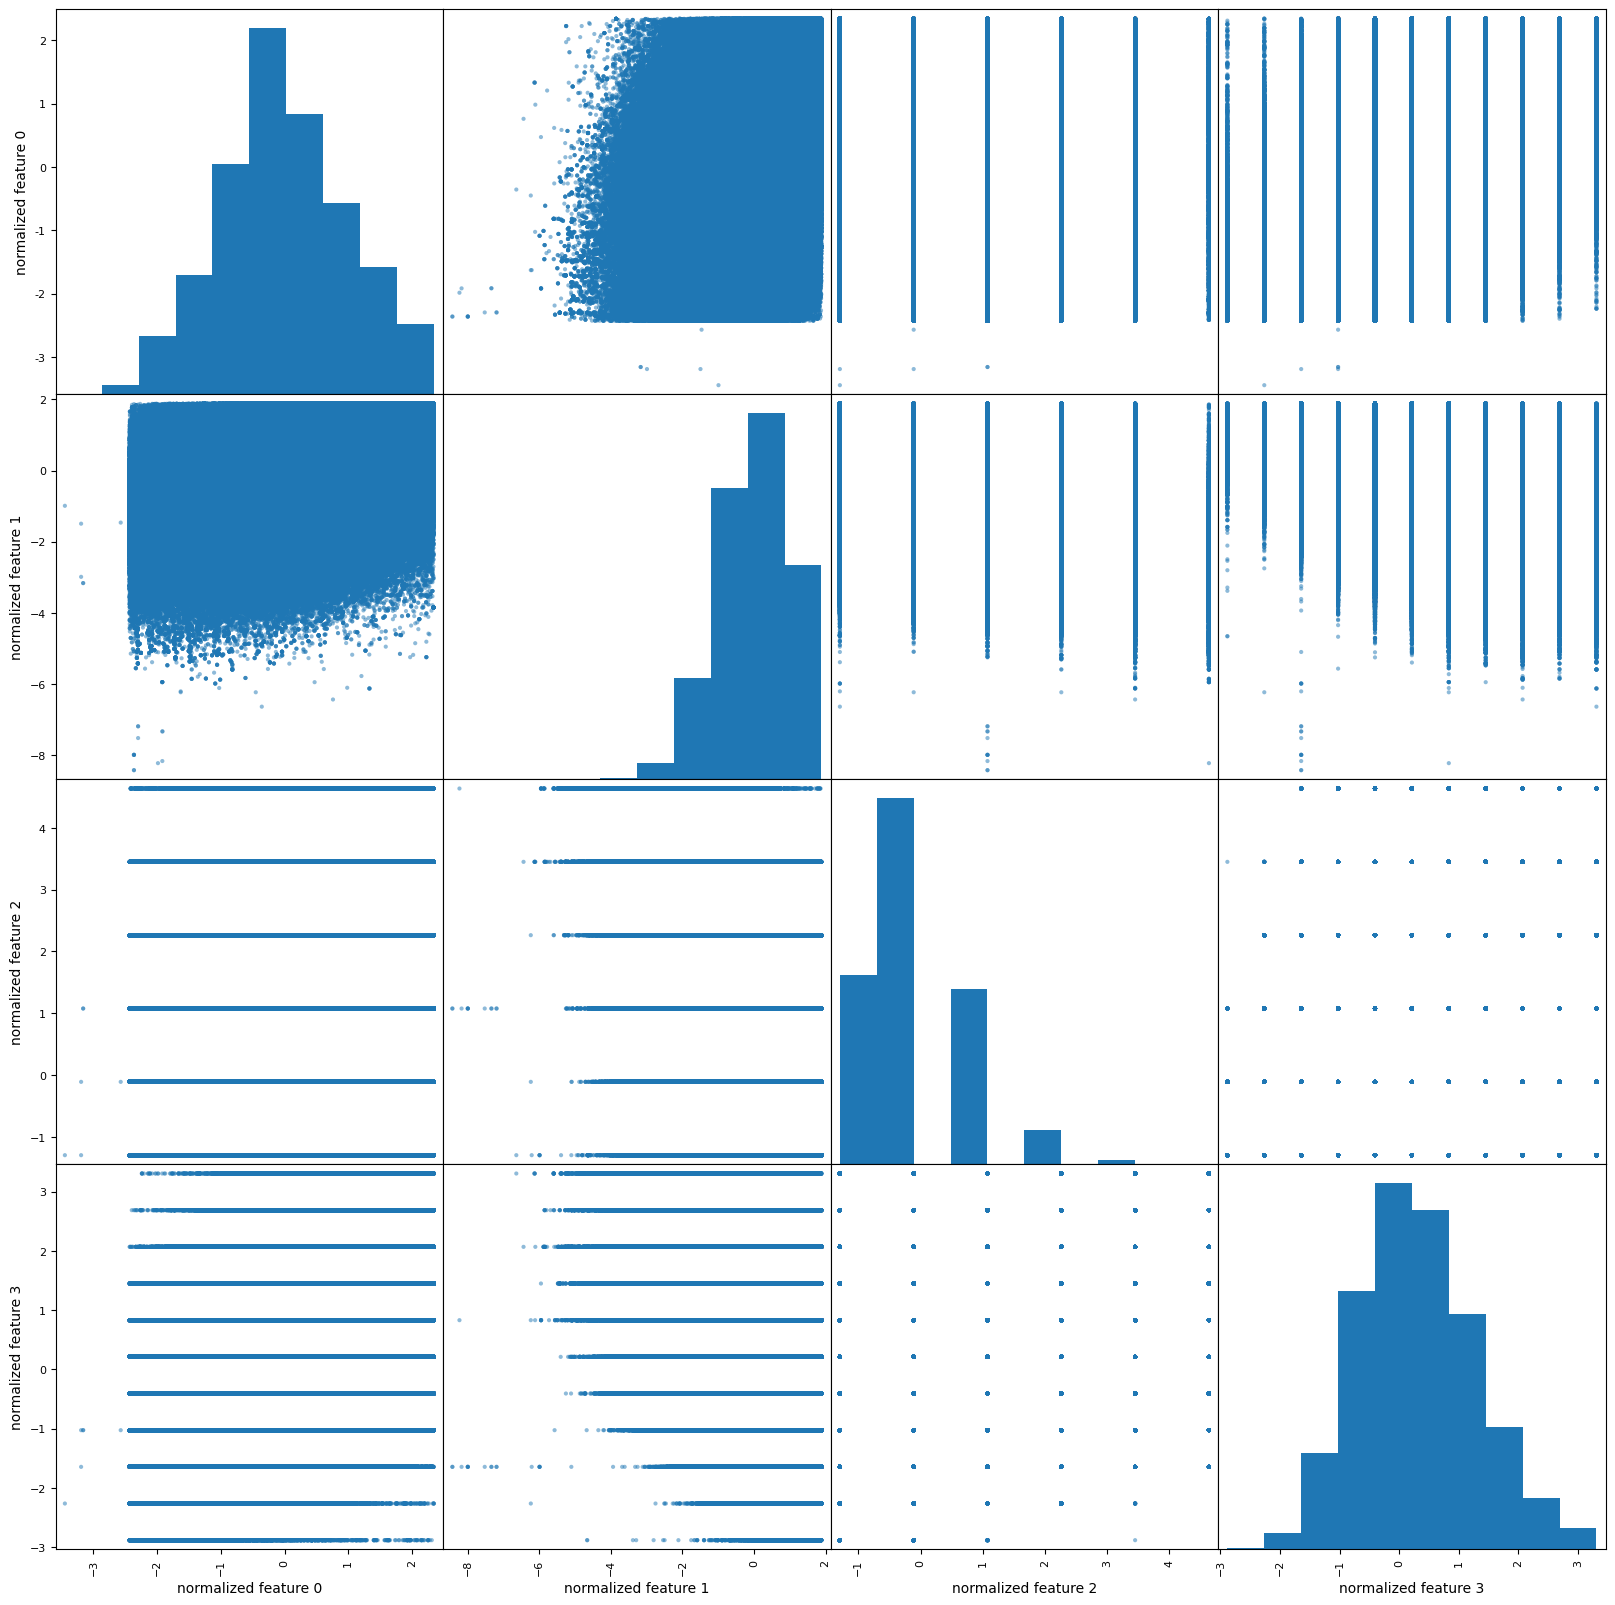

In [35]:
pd.plotting.scatter_matrix(
    normalized_data[["normalized feature 0", "normalized feature 1", "normalized feature 2", "normalized feature 3"]], figsize=(20,20), diagonal="hist"
)

In [37]:
normalized_data.to_csv("clustered_data_by_kmeans.csv")

In [39]:
cluster_6 = normalized_data[normalized_data["cluster"] == 6]
cluster_6


,normalized feature 0,normalized feature 1,normalized feature 2,normalized feature 3,cluster
116,1.525730,0.966418,-0.109888,0.213286,6
135,1.542097,0.797275,-0.109888,-0.405863,6
149,1.541858,0.944154,1.076821,0.832435,6
222,1.536572,0.637388,-0.109888,-0.405863,6
288,1.525794,1.023920,-0.109888,-0.405863,6
...,...,...,...,...,...
10276477,1.541922,1.835060,-1.296597,1.451584,6
10276478,1.541922,1.835060,-1.296597,1.451584,6
10276479,1.541922,1.835060,-1.296597,1.451584,6
10276481,1.541922,1.835060,-1.296597,1.451584,6


In [40]:
cluster_6 = cluster_6.reset_index(drop=True)
cluster_6

,normalized feature 0,normalized feature 1,normalized feature 2,normalized feature 3,cluster
0,1.525730,0.966418,-0.109888,0.213286,6
1,1.542097,0.797275,-0.109888,-0.405863,6
2,1.541858,0.944154,1.076821,0.832435,6
3,1.536572,0.637388,-0.109888,-0.405863,6
4,1.525794,1.023920,-0.109888,-0.405863,6
...,...,...,...,...,...
65120,1.541922,1.835060,-1.296597,1.451584,6
65121,1.541922,1.835060,-1.296597,1.451584,6
65122,1.541922,1.835060,-1.296597,1.451584,6
65123,1.541922,1.835060,-1.296597,1.451584,6


array([[<Axes: xlabel='normalized feature 0', ylabel='normalized feature 0'>,
        <Axes: xlabel='normalized feature 1', ylabel='normalized feature 0'>,
        <Axes: xlabel='normalized feature 2', ylabel='normalized feature 0'>,
        <Axes: xlabel='normalized feature 3', ylabel='normalized feature 0'>],
       [<Axes: xlabel='normalized feature 0', ylabel='normalized feature 1'>,
        <Axes: xlabel='normalized feature 1', ylabel='normalized feature 1'>,
        <Axes: xlabel='normalized feature 2', ylabel='normalized feature 1'>,
        <Axes: xlabel='normalized feature 3', ylabel='normalized feature 1'>],
       [<Axes: xlabel='normalized feature 0', ylabel='normalized feature 2'>,
        <Axes: xlabel='normalized feature 1', ylabel='normalized feature 2'>,
        <Axes: xlabel='normalized feature 2', ylabel='normalized feature 2'>,
        <Axes: xlabel='normalized feature 3', ylabel='normalized feature 2'>],
       [<Axes: xlabel='normalized feature 0', ylabel='normali

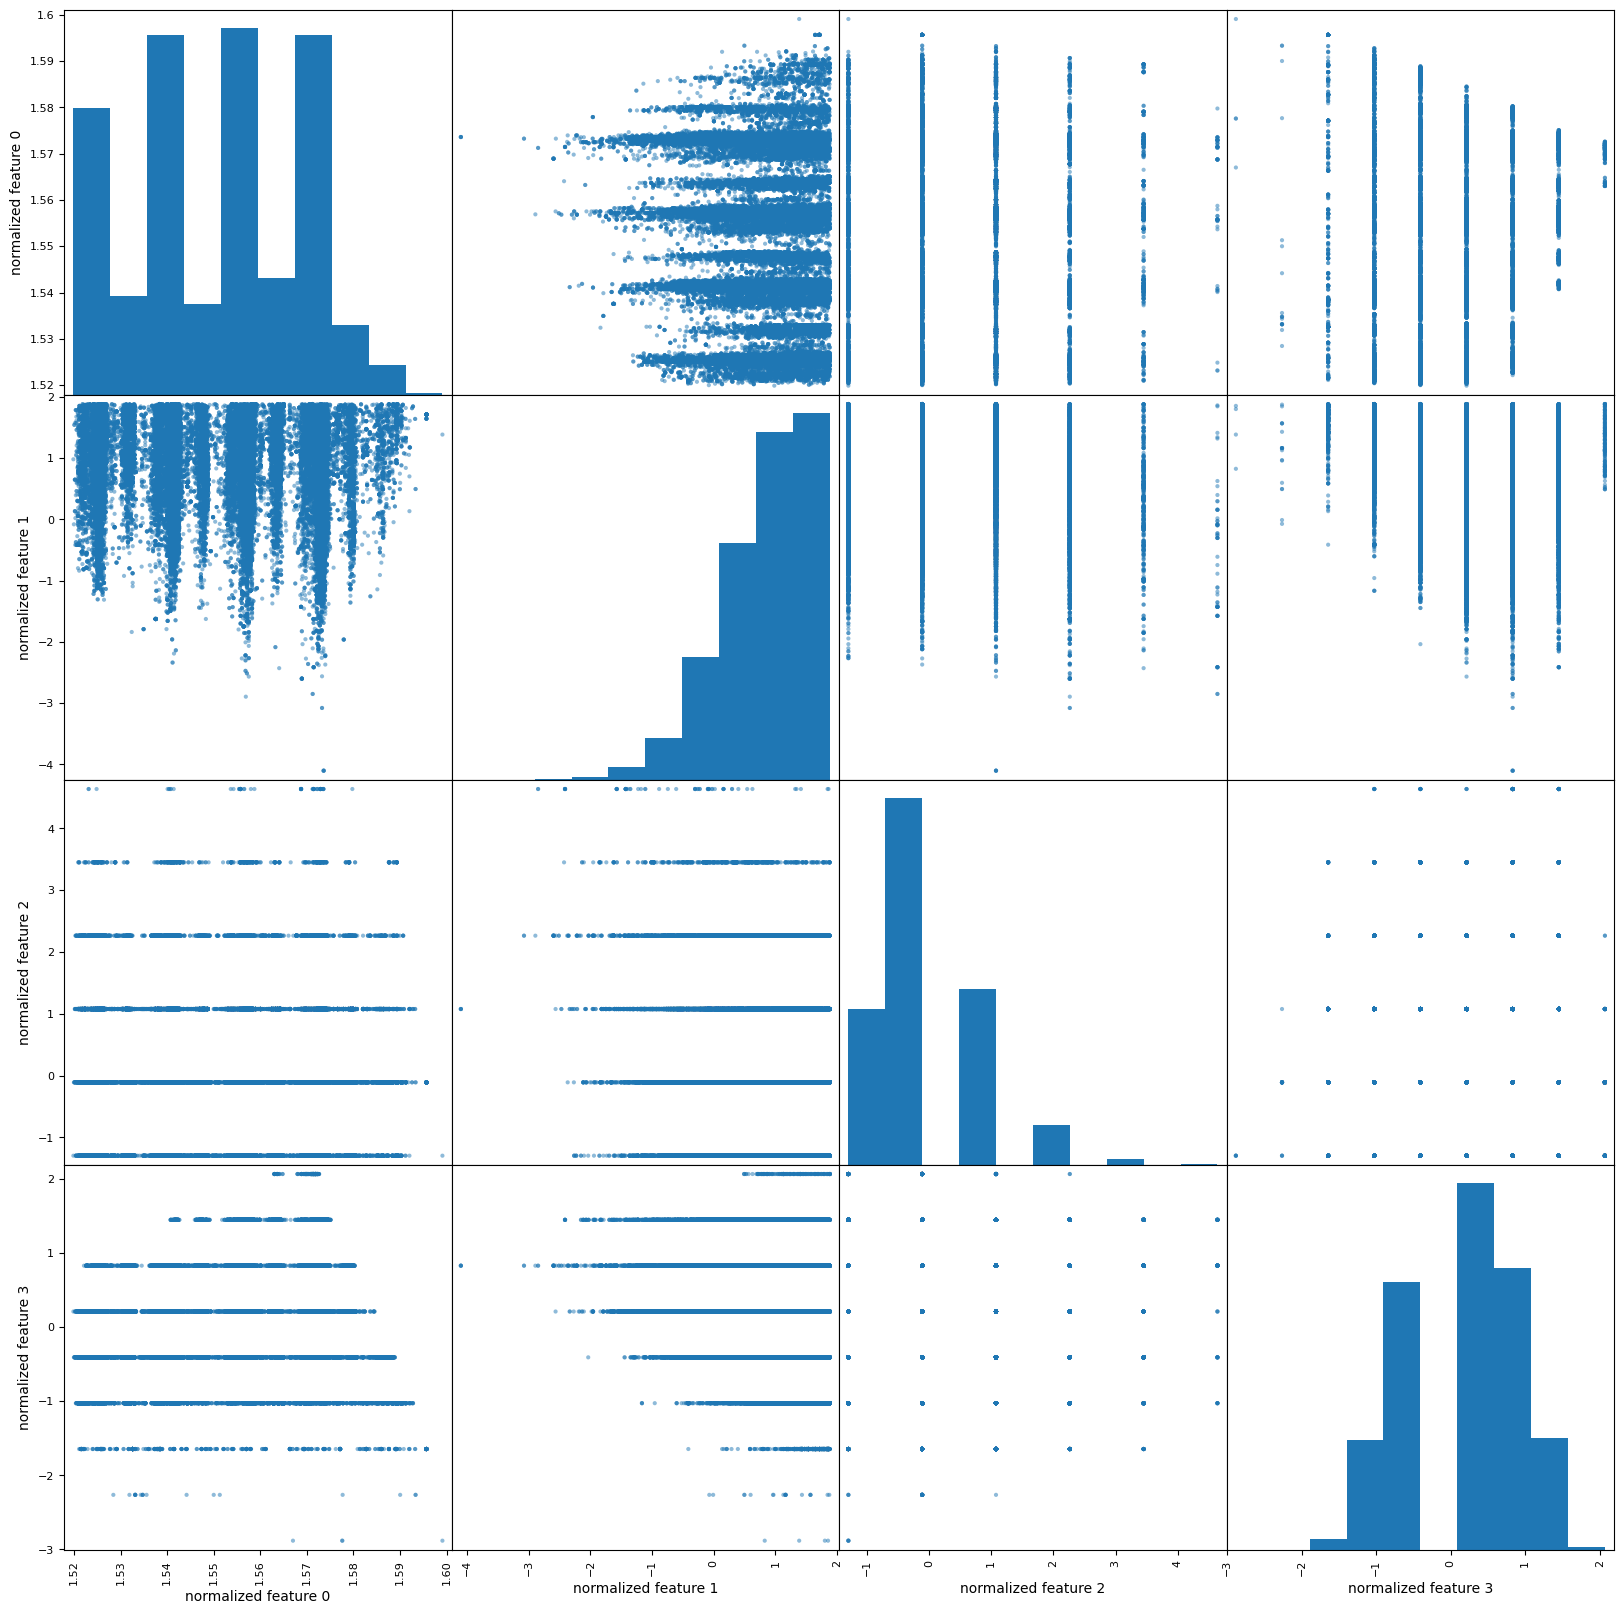

In [41]:
pd.plotting.scatter_matrix(
    cluster_6[["normalized feature 0", "normalized feature 1", "normalized feature 2", "normalized feature 3"]], figsize=(20,20), diagonal="hist"
)

In [30]:
origianl_with_cluster_data = pd.concat([final_data, kmeans.labels_], axis=1)
origianl_with_cluster_data

,MolWt,LogP,HDonors,HAcceptors,cluster
0,434.515,3.8361,2.0,5.0,68
1,447.967,3.8307,1.0,6.0,97
2,437.515,3.6316,1.0,5.0,146
3,434.462,3.6889,2.0,5.0,68
4,430.961,3.8461,3.0,4.0,99
...,...,...,...,...,...
10301984,343.365,-0.8124,1.0,7.0,81
10301985,329.265,-0.6892,1.0,8.0,113
10301986,328.350,-0.0430,2.0,6.0,113
10301987,332.272,-0.0249,1.0,8.0,64


In [31]:
original_cluster_6 = origianl_with_cluster_data[origianl_with_cluster_data["cluster"] == 6]
original_cluster_6

,MolWt,LogP,HDonors,HAcceptors,cluster
116,448.563,3.91246,1.0,5.0,6
135,449.591,3.71220,1.0,4.0,6
149,449.576,3.88610,2.0,6.0,6
222,449.244,3.52290,1.0,4.0,6
288,448.567,3.98054,1.0,4.0,6
...,...,...,...,...,...
10276477,449.580,4.94090,0.0,7.0,6
10276478,449.580,4.94090,0.0,7.0,6
10276479,449.580,4.94090,0.0,7.0,6
10276481,449.580,4.94090,0.0,7.0,6


In [33]:
original_cluster_6 = original_cluster_6.reset_index(drop=True)
original_cluster_6

,MolWt,LogP,HDonors,HAcceptors,cluster
0,448.563,3.91246,1.0,5.0,6
1,449.591,3.71220,1.0,4.0,6
2,449.576,3.88610,2.0,6.0,6
3,449.244,3.52290,1.0,4.0,6
4,448.567,3.98054,1.0,4.0,6
...,...,...,...,...,...
65120,449.580,4.94090,0.0,7.0,6
65121,449.580,4.94090,0.0,7.0,6
65122,449.580,4.94090,0.0,7.0,6
65123,449.580,4.94090,0.0,7.0,6


In [34]:
original_cluster_6.to_csv("final_data_with_cluster.csv")